# AeroFit Treadmill Customer Analysis

### 1. Problem Statement and Defining Business Objectives

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

### 2. Data Loading and Initial Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('aerofit_treadmill.csv')

# View the first few rows
print('--- First 5 Rows ---')
print(df.head())


--- First 5 Rows ---
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


In [3]:
# Get information about the dataset
print('\n--- Data Info ---')
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
# Get statistical summary
print('\n--- Statistical Summary ---')
print(df.describe())


--- Statistical Summary ---
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


In [5]:
# Check for missing values
print('\n--- Missing Values ---')
print(df.isnull().sum())


--- Missing Values ---
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


### 3. Visual Analysis (EDA)

#### Univariate Analysis

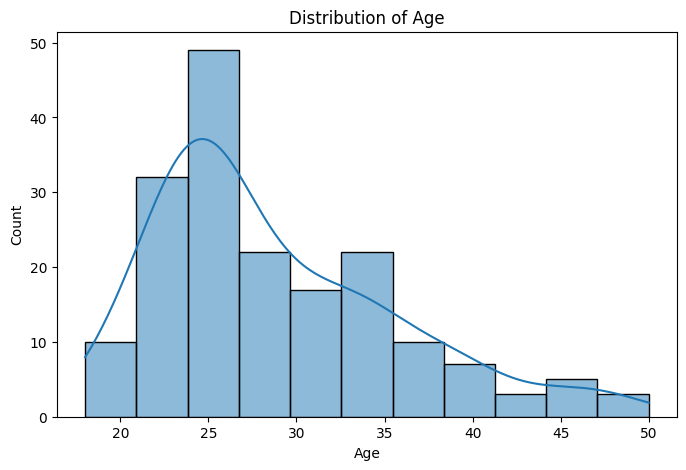

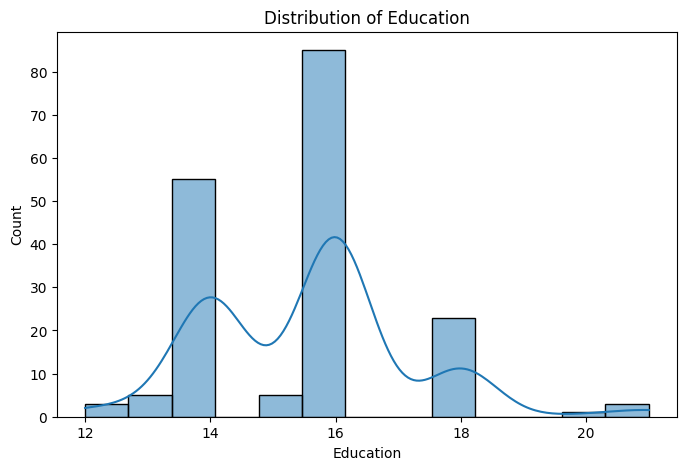

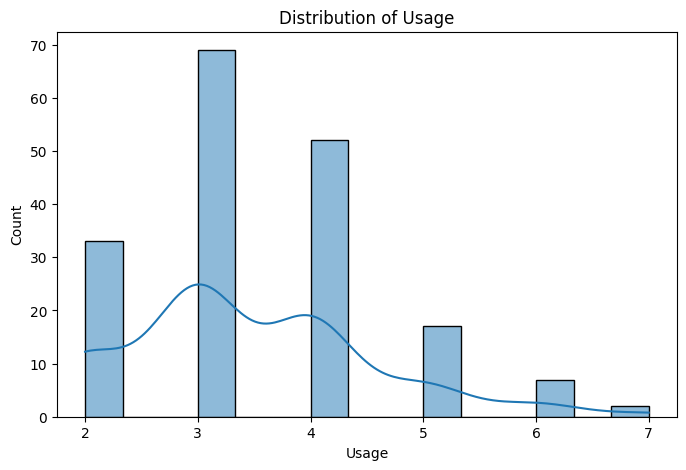

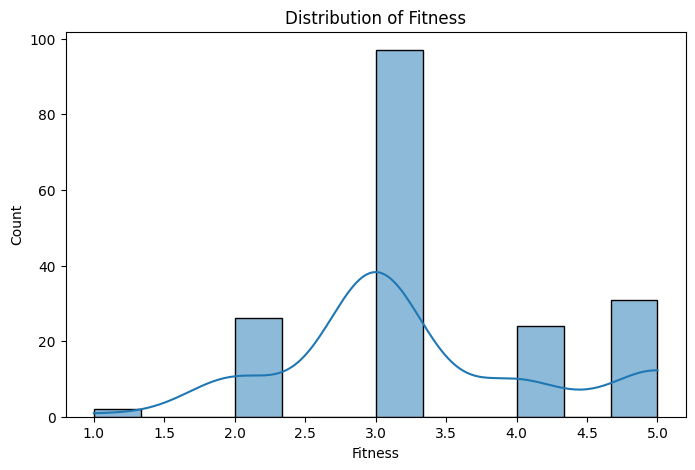

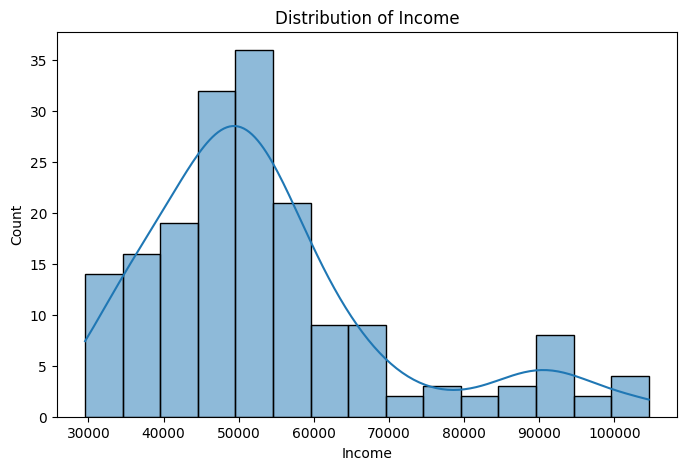

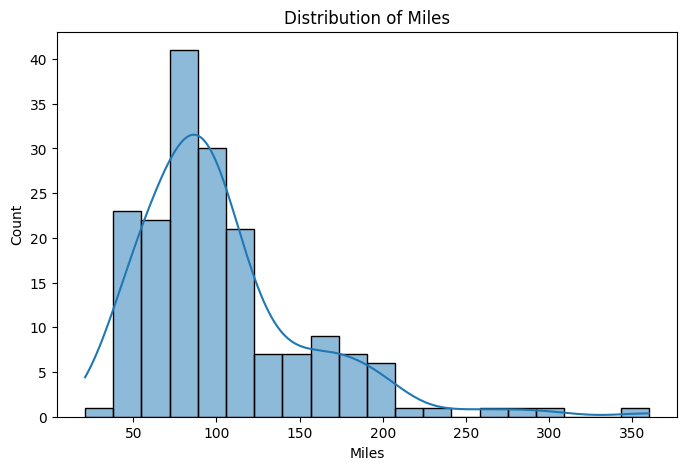

In [6]:
# Histograms for numerical features
numerical_features = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

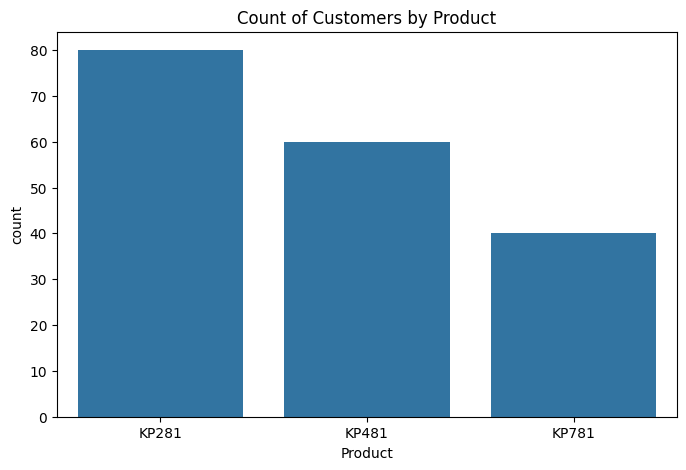

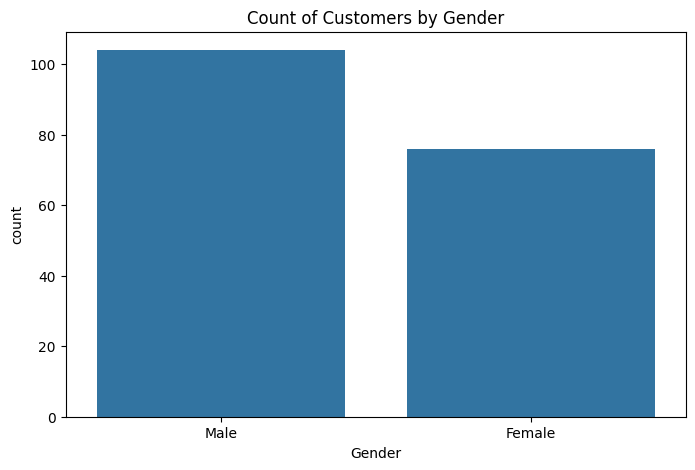

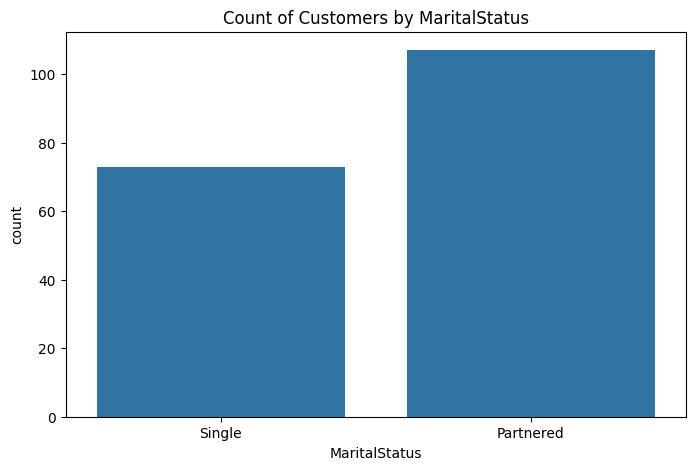

In [7]:
# Countplots for categorical features
categorical_features = ['Product', 'Gender', 'MaritalStatus']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of Customers by {feature}')
    plt.show()

#### Bivariate Analysis

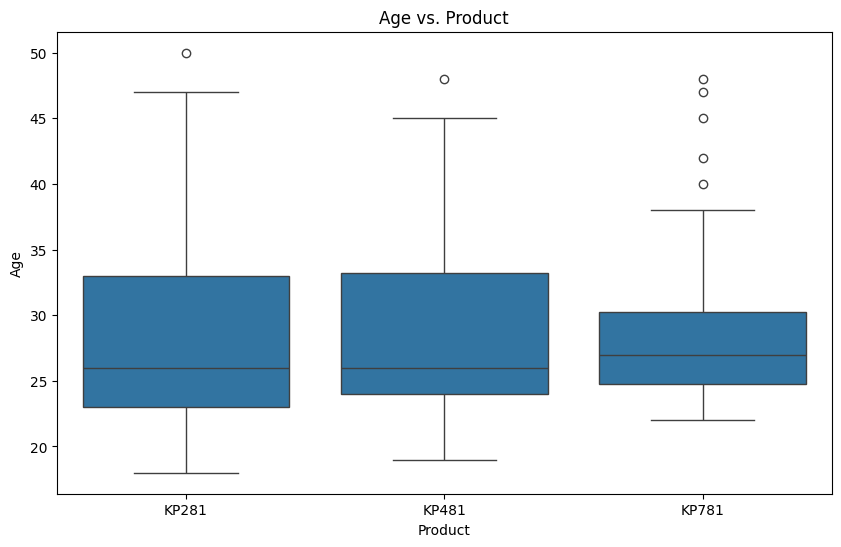

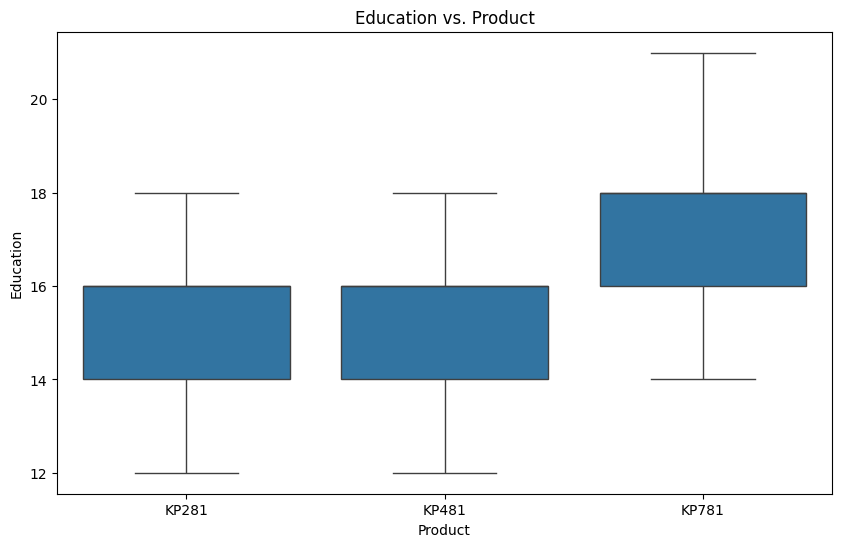

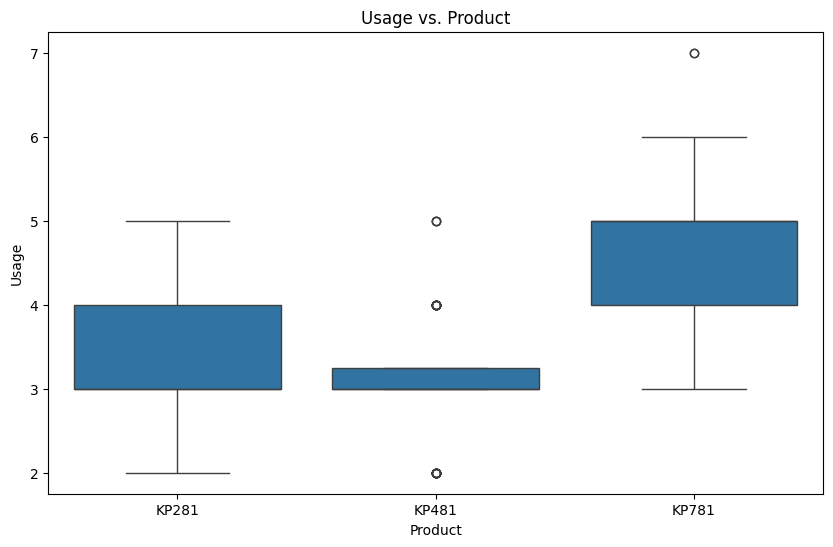

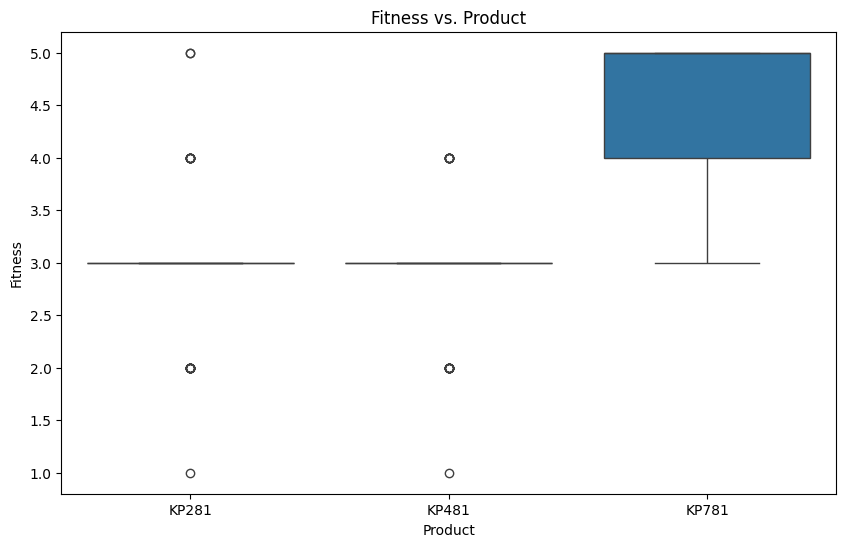

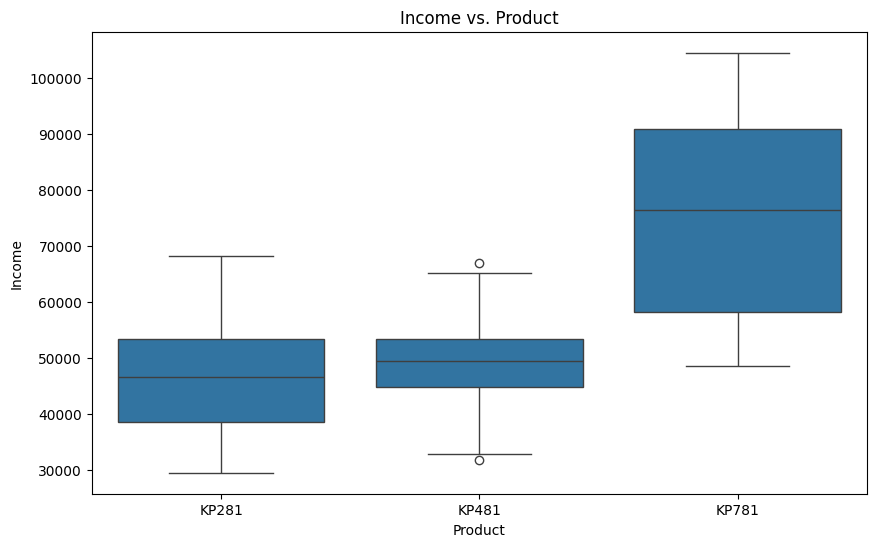

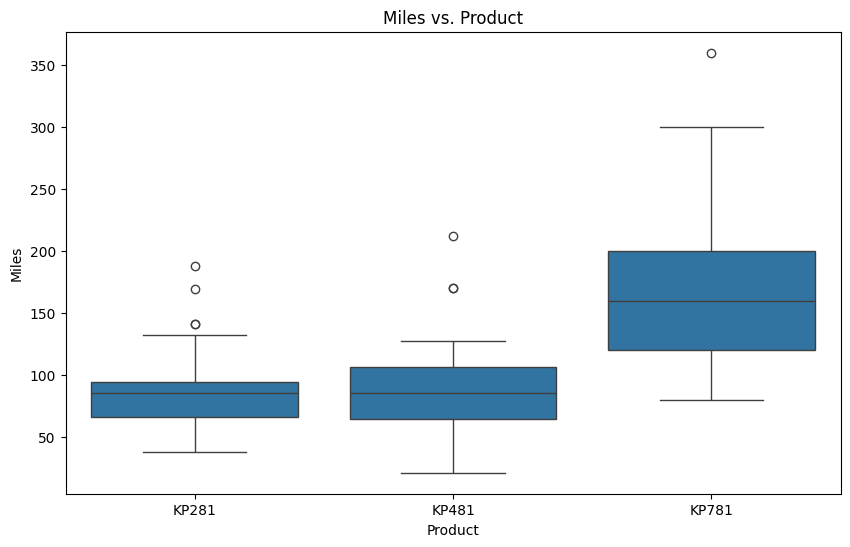

In [8]:
# Boxplots for numerical features vs. Product
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Product', y=feature, data=df)
    plt.title(f'{feature} vs. Product')
    plt.show()

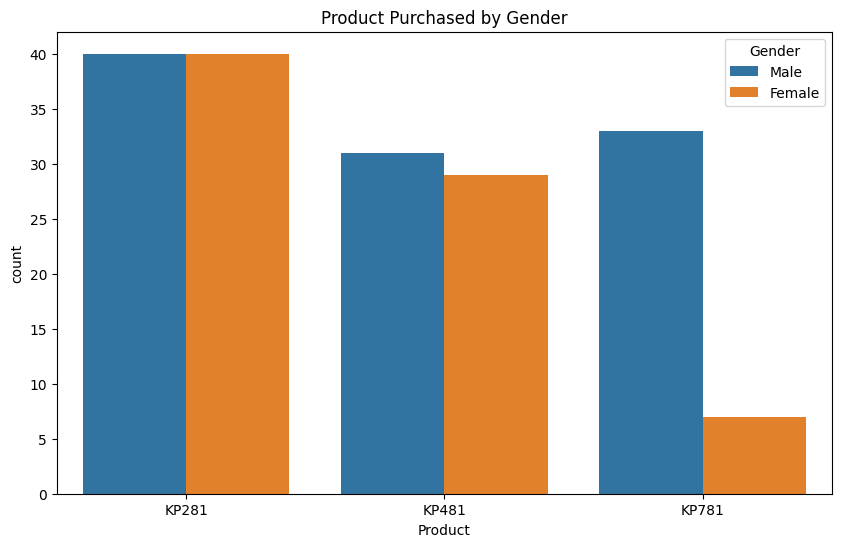

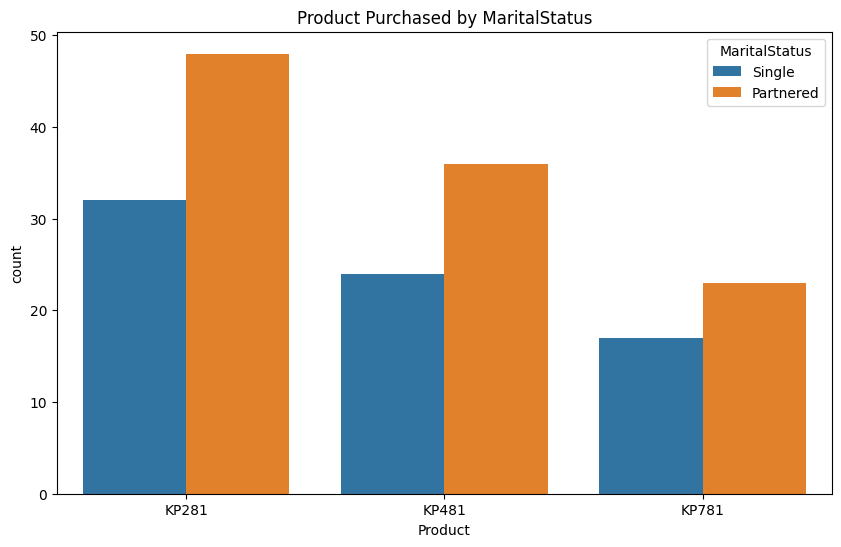

In [9]:
# Countplots for categorical features vs. Product
for feature in ['Gender', 'MaritalStatus']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Product', hue=feature, data=df)
    plt.title(f'Product Purchased by {feature}')
    plt.legend(title=feature)
    plt.show()

#### Correlation Analysis

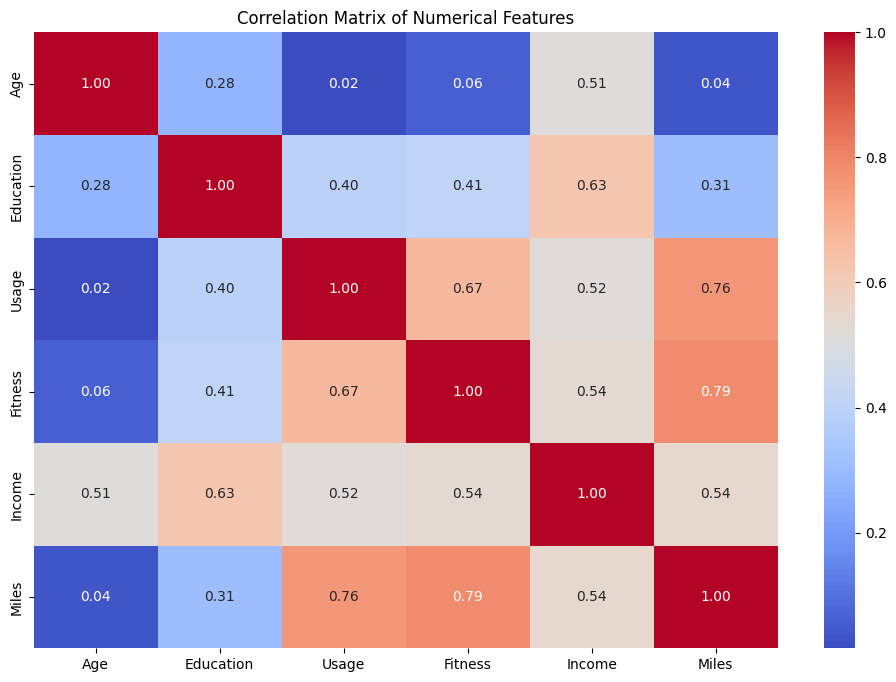

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

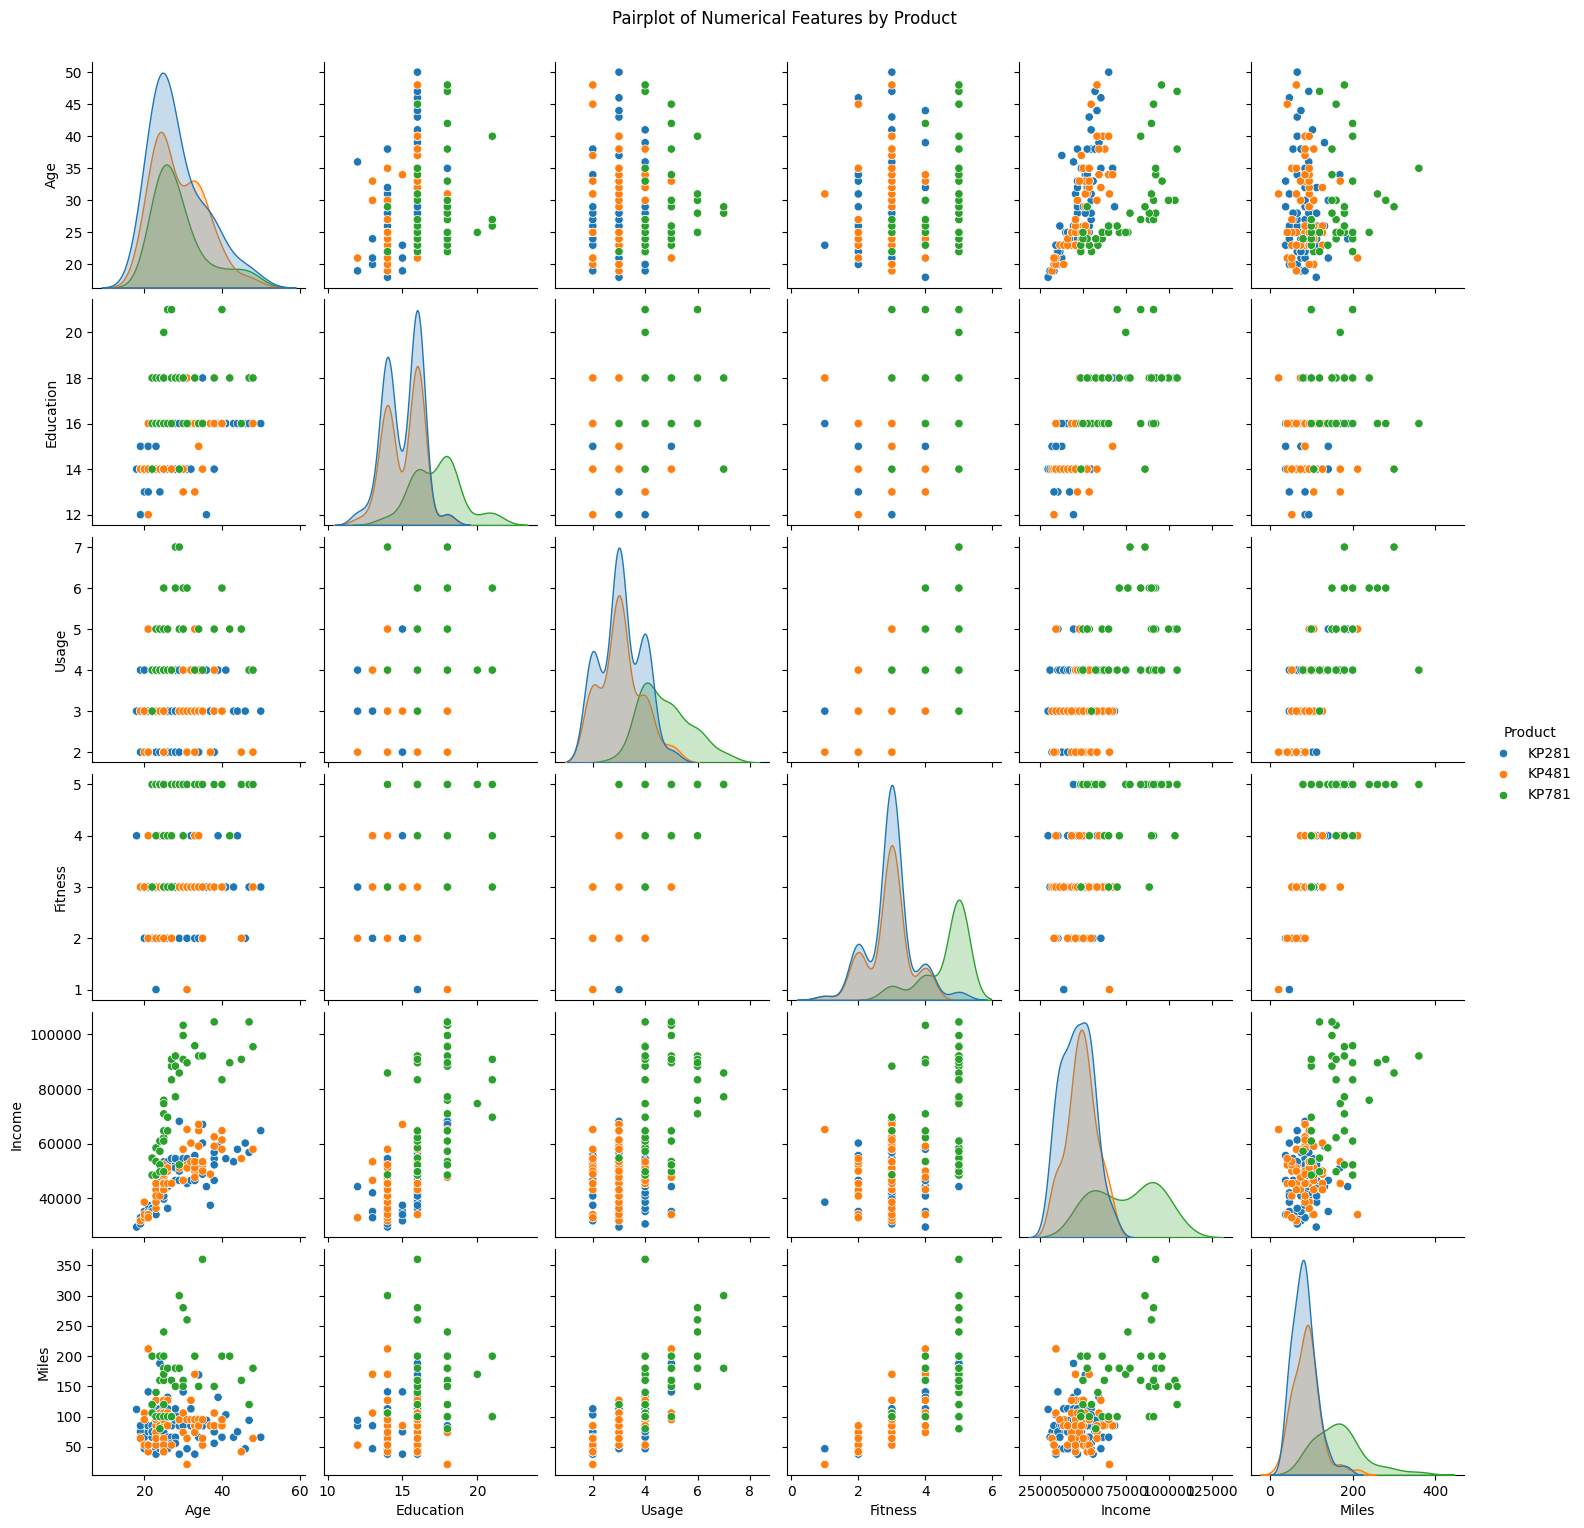

In [11]:
# Pairplot
sns.pairplot(df, hue='Product')
plt.suptitle('Pairplot of Numerical Features by Product', y=1.02)
plt.show()

### 4. Probability Analysis

In [12]:
# Marginal Probability of each Product
print('--- Marginal Probability of each Product ---')
marginal_prob_product = df['Product'].value_counts(normalize=True) * 100
print(marginal_prob_product.round(2).astype(str) + '%')

--- Marginal Probability of each Product ---
Product
KP281    44.44%
KP481    33.33%
KP781    22.22%
Name: proportion, dtype: object


In [13]:
# Contingency table for Product and Gender
gender_crosstab = pd.crosstab(df['Product'], df['Gender'])
print('--- Contingency Table: Product vs. Gender ---')
print(gender_crosstab)

--- Contingency Table: Product vs. Gender ---
Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33


In [14]:
# Conditional Probability of buying a product given Gender
print('\n--- Conditional Probability of Product given Gender ---')
conditional_prob_gender = pd.crosstab(df['Product'], df['Gender'], normalize='columns') * 100
print(conditional_prob_gender.round(2).astype(str) + '%')


--- Conditional Probability of Product given Gender ---
Gender   Female    Male
Product                
KP281    52.63%  38.46%
KP481    38.16%  29.81%
KP781     9.21%  31.73%


In [15]:
# Answering: What is the probability of a male customer buying a KP781 treadmill?
prob_kp781_given_male = conditional_prob_gender.loc['KP781', 'Male']
print(f"\nThe probability of a male customer buying a KP781 treadmill is: {prob_kp781_given_male:.2f}%")


The probability of a male customer buying a KP781 treadmill is: 31.73%


### 5. Customer Profiling

#### Profile: The 'Beginner' - KP281 Buyer
- **Demographics:** Younger (average age 28.5), roughly an even split of male/female and single/partnered.
- **Socio-Economic:** Average education (15 years) and lower income (average \$46k).
- **Fitness Goals:** A casual user, planning to use the treadmill about 3 times a week. They rate their own fitness as average.

#### Profile: The 'Intermediate' - KP481 Buyer
- **Demographics:** Similar age to the KP281 buyer (average 28.9), slightly more likely to be male and partnered.
- **Socio-Economic:** Similar education (15 years) and a slightly higher income (average \$49k).
- **Fitness Goals:** Very similar usage and fitness profile to the KP281 buyer.

#### Profile: The 'Enthusiast' - KP781 Buyer
- **Demographics:** Average age of 29, but **overwhelmingly male (83%)**.
- **Socio-Economic:** Higher education (average 17 years) and significantly higher income (average \$75k).
- **Fitness Goals:** A serious and committed user (4-5 times a week). They rate themselves as very fit.

### 6. Recommendations

1.  **Targeted Marketing for the KP781:** Focus campaigns on serious male runners and fitness enthusiasts. Highlight high-performance features.
2.  **Broaden the Appeal of Entry-Level Models (KP281 & KP481):** Use inclusive marketing focused on 'getting started'. Clearly differentiate the value proposition between the KP281 and KP481.
3.  **In-Store and Online Sales Strategy:** Train staff to qualify customers by fitness goals and income. Develop an online quiz: 'Which Treadmill is Right for You?'.
4.  **Future Product Development:** Explore a premium model designed for female enthusiasts and consider a model to bridge the price/feature gap between the KP481 and KP781.